# PCA

ok so as far as i understand this, if i take some data, take the covariance matrix, i can get the eigenvectors and sort to get principal components

## Imports

In [24]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Helpers

In [34]:
def visualize_image(img_array):
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    plt.show()

In [25]:
def load_mnist():
	(X_train, y_train), (X_test, y_test) = mnist.load_data()
	return X_train, y_train, X_test, y_test

## Data Processing

In [26]:
X_train, y_train, X_test, y_test = load_mnist()

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
img = X_train[0]

In [38]:
# normalize
img = img / 255

In [39]:
img.shape

(28, 28)

In [40]:
img_centered = img - np.mean(img, axis=0)

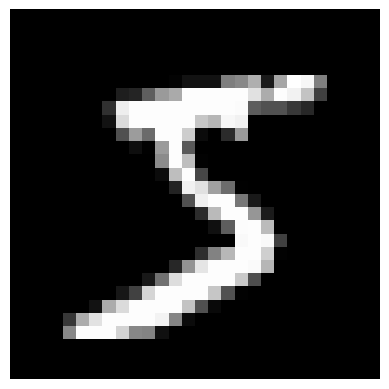

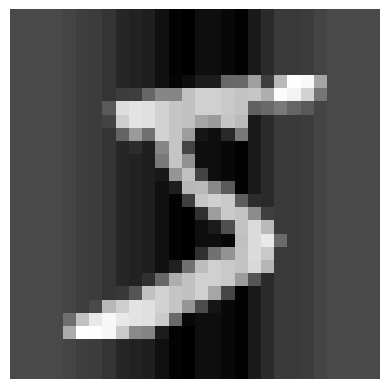

In [42]:
visualize_image(img)
visualize_image(img_centered)

## Calculate Covariance Matrix for 28x28 Input

we can use numpy for now

In [44]:
cov_matrix = np.cov(img_centered, rowvar=False)

In [45]:
cov_matrix.shape

(28, 28)

In [46]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [47]:
""" we got them in ascending order, want them to be descending """

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [52]:
eigenvalues

array([8.67662778e-01, 6.68885015e-01, 3.03801014e-01, 1.73264392e-01,
       1.37741267e-01, 6.62020482e-02, 4.05072016e-02, 2.65114194e-02,
       1.00751223e-02, 6.64972371e-03, 3.53981297e-03, 2.58258496e-03,
       2.41539749e-03, 7.84289879e-04, 6.19025401e-04, 2.76847108e-04,
       1.66542028e-04, 2.83579894e-05, 1.11236171e-06, 1.71017164e-10,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

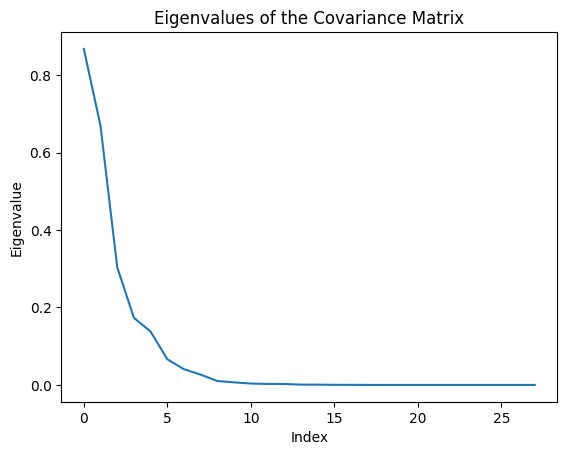

In [56]:
plt.plot(eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the Covariance Matrix')
plt.show()

## Principal Components

based on the graph above, seems like first 5 should be enough, afterwards values taper a lot

In [87]:
k = 10
top_k_eigenvectors = eigenvectors[:, :k]

In [88]:
top_k_eigenvectors.shape

(28, 10)

In [89]:
img_pca = img_centered @ top_k_eigenvectors

In [90]:
img_reconstructed = (img_pca @ top_k_eigenvectors.T) + np.mean(img, axis=0)

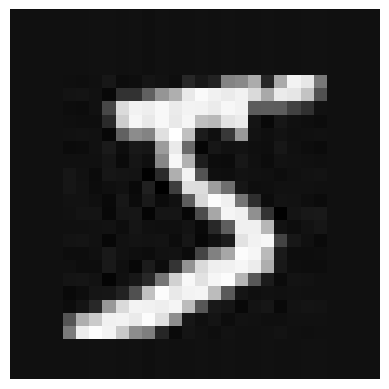

In [91]:
visualize_image(img_reconstructed)